In [ ]:
#import libraries
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split#to preprocess data
#Load the data
iris = sklearn.datasets.load_iris() # Load the dataset once
df = pd.DataFrame(iris.data, columns=iris.feature_names) # Assign the data and feature names to df
# You can optionally create DataFrames for target and target names as well,
# but they are not assigned to df in this case.
target_df = pd.DataFrame(iris.target, columns=['target'])
target_names_df = pd.DataFrame(iris.target_names, columns=['target_names'])


In [ ]:
#Explore the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
corr=df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


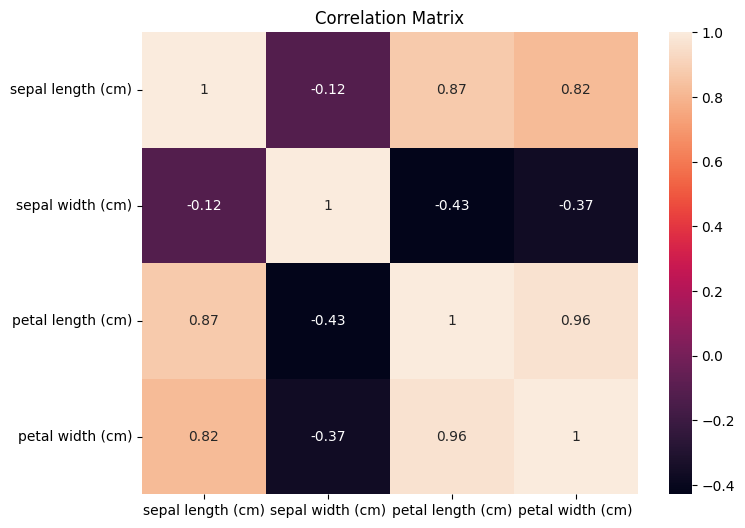

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Preprocess the data
# Combine the features (df) and the target variable (target_df) for splitting
# Alternatively, you can keep them separate and pass both to train_test_split
# X = df # Features
# y = target_df['target'] # Target variable (as a Series or array)

# Assuming you want to split the features (df) and the target (target_df) together
from sklearn.model_selection import train_test_split

# Concatenate features and target for a single split operation
data = pd.concat([df, target_df], axis=1)

# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added test_size and random_state

# You can then print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [ ]:
#Train the model
# Import the DecisionTreeClassifier from the correct module
from sklearn.tree import DecisionTreeClassifier

# Instantiate the DecisionTreeClassifier
# You can optionally specify parameters like criterion, max_depth, etc.
model = DecisionTreeClassifier(random_state=42) # Added random_state for reproducibility

# Train the DecisionTreeClassifier model
model.fit(X_train, y_train)

print("Decision Tree model trained successfully.")

# Make predictions using the test data
y_pred = model.predict(X_test)

print("\nPredictions made on the test data.")

Decision Tree model trained successfully.

Predictions made on the test data.


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


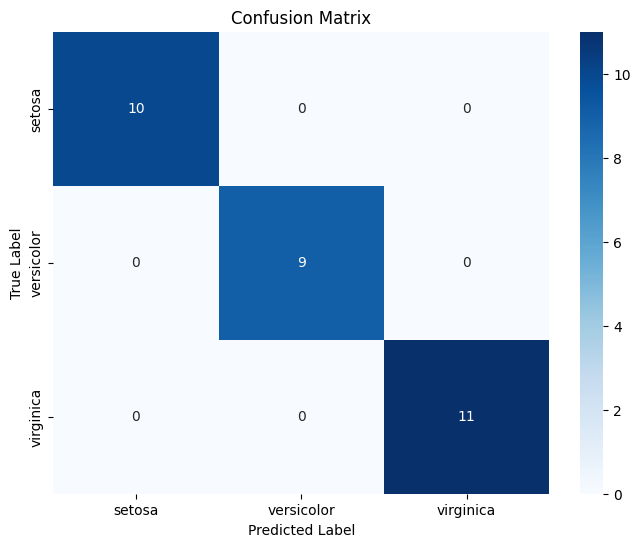

In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


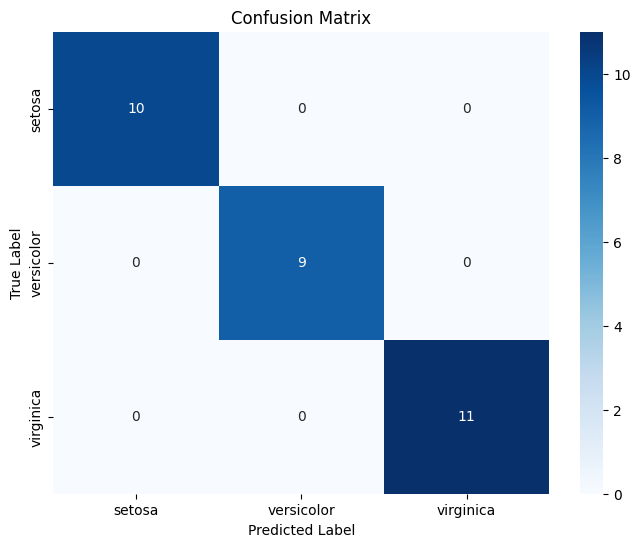

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-73-6a5ff0c525b2>:57: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(*scatter.legend_elements(), title="Classes", loc="lower right", labels=iris.target_names)


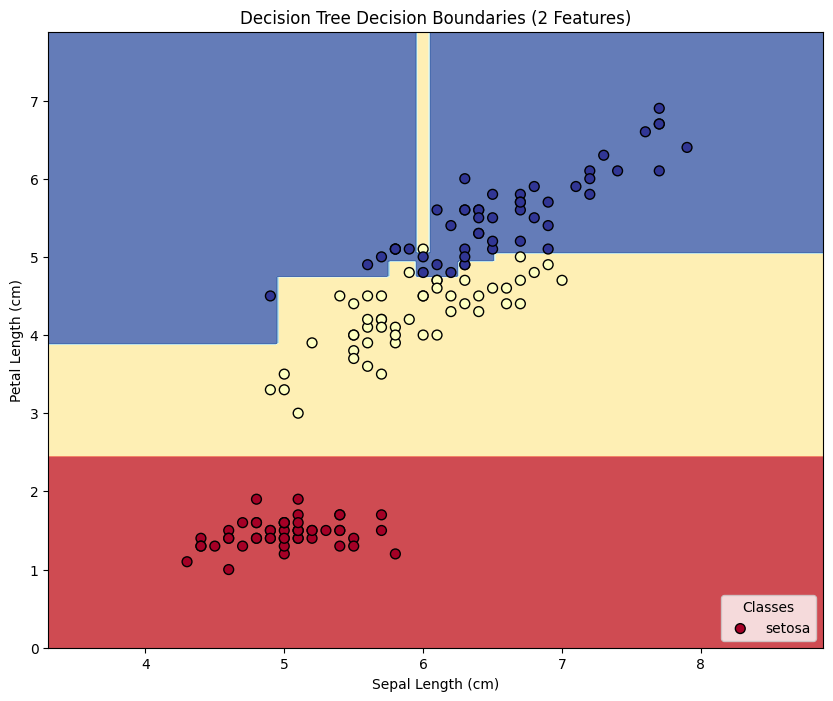

In [ ]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- Plotting Decision Boundaries (Example using only 2 features) ---
# This is an illustrative example, not a full representation of the 4D decision boundaries.

# Choose two features for visualization (e.g., sepal length and petal length)
X_visualize = X[['sepal length (cm)', 'petal length (cm)']]
# Retrain a model on only these two features for visualization purposes
# Note: This model is different from the one trained on all features.
model_visualize = DecisionTreeClassifier(random_state=42)
model_visualize.fit(X_visualize, y) # Use the whole dataset for boundary plotting clarity

# Create a meshgrid to plot the decision boundaries
x_min, x_max = X_visualize['sepal length (cm)'].min() - 1, X_visualize['sepal length (cm)'].max() + 1
y_min, y_max = X_visualize['petal length (cm)'].min() - 1, X_visualize['petal length (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = model_visualize.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the actual data points
scatter = plt.scatter(X_visualize['sepal length (cm)'], X_visualize['petal length (cm)'], c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Decision Tree Decision Boundaries (2 Features)')
plt.legend(*scatter.legend_elements(), title="Classes", loc="lower right", labels=iris.target_names)
plt.show()